##  MACHINE LEARNING SUPERVISED LEARNING
The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [80]:
#load data
drugs_df = pd.read_csv('drug200.csv')
drugs_df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [81]:
# check for missing values
drugs_df.info()
drugs_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='Age'>

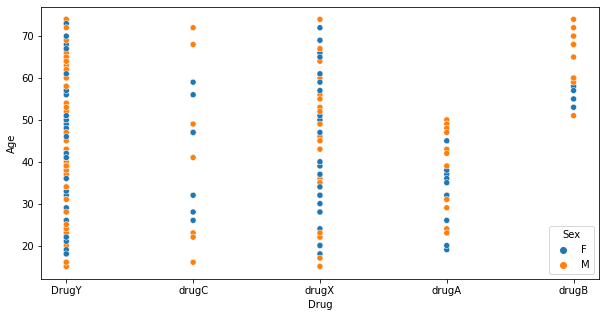

In [82]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=drugs_df)

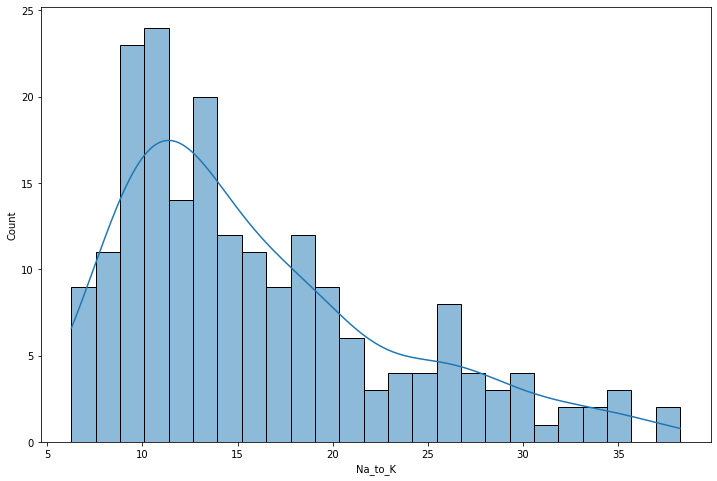

In [83]:

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(drugs_df['Na_to_K'], bins=25, kde=True)
plt.show()

In [84]:
# Converting the non-numeric values into numeric values

drugs_df['Sex'] = drugs_df['Sex'].map({'M': 1, 'F': 2})
drugs_df['BP'] = drugs_df['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drugs_df['Cholesterol'] = drugs_df['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
drugs_df["Drug"] = drugs_df["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})
drugs_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


## K- NEAREST NEIGHBORS ALGORITHM

In [90]:
X=drugs_df.drop('Drug',axis=1).values
y=drugs_df['Drug'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,test_size=0.3,stratify=y)
knn=KNeighborsClassifier(n_neighbors=4)

In [91]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [92]:
y_pred=knn.predict(X_test)


In [93]:
knn.score(X_test,y_test)

0.7333333333333333

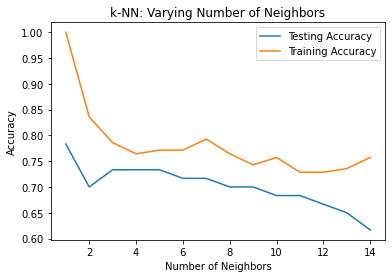

In [94]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)    
    test_accuracy[i] = knn.score(X_test, y_test)    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
    